In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, boxcox
from scipy import stats

In [3]:
data = pd.read_csv("insurance.csv")

Feature Engineering
In this section, we will make some corrections that we noted above and we will make the features more suitable for the model.

Sex

Children

Smoker

Region

Charges

In [4]:
data["sex"] = [0 if i == "female" else 1 for i in data["sex"]]
data["sex"] = data["sex"].astype("category")
data = pd.get_dummies(data, columns= ["sex"])
data.head()

,age,bmi,children,smoker,region,charges,sex_0,sex_1
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


the gender is recorded as male and female. We change this to 0 and 1 so that our model can understand.

female --> 0

male --> 1

C:\Users\zahed\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


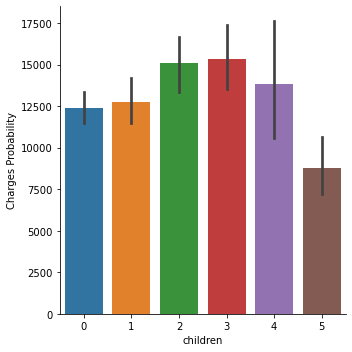

In [5]:
g = sns.factorplot(x = "children", y = "charges", data = data, kind = "bar")
g.set_ylabels("Charges Probability")
plt.show()

We look at the effect of the number of children on wages. The effect of 2 and 3 on the model is almost the same, maybe they can be combined, but there is no need for now.

In [6]:
data["children"] = data["children"].astype("category")
data = pd.get_dummies(data, columns= ["children"])
data.head()

,age,bmi,smoker,region,charges,sex_0,sex_1,children_0,children_1,children_2,children_3,children_4,children_5
0,19,27.900,yes,southwest,16884.92400,1,0,1,0,0,0,0,0
1,18,33.770,no,southeast,1725.55230,0,1,0,1,0,0,0,0
2,28,33.000,no,southeast,4449.46200,0,1,0,0,0,1,0,0
3,33,22.705,no,northwest,21984.47061,0,1,1,0,0,0,0,0
4,32,28.880,no,northwest,3866.85520,0,1,1,0,0,0,0,0


In [7]:
data["smoker"] = [0 if i == "no" else 1 for i in data["smoker"]]

We change the data saved as yes and no to 0 and 1.

no --> 0

yes --> 1

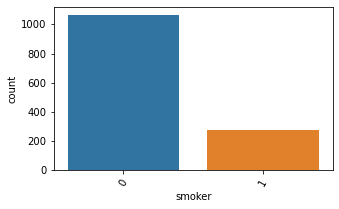

In [8]:
plt.figure(figsize=(5,3))
sns.countplot(x="smoker", data = data)
plt.xticks(rotation = 60)
plt.show()


C:\Users\zahed\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


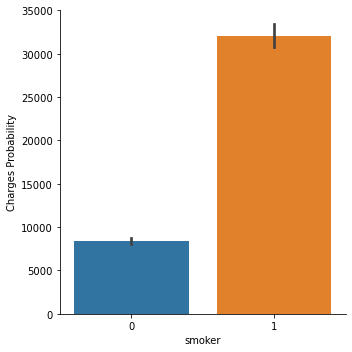

In [9]:
g = sns.factorplot(x = "smoker", y = "charges", data = data, kind = "bar")
g.set_ylabels("Charges Probability")
plt.show()

In [10]:
data["smoker"] = data["smoker"].astype("category")
data = pd.get_dummies(data, columns= ["smoker"])
data.head()

,age,bmi,region,charges,sex_0,sex_1,children_0,children_1,children_2,children_3,children_4,children_5,smoker_0,smoker_1
0,19,27.900,southwest,16884.92400,1,0,1,0,0,0,0,0,0,1
1,18,33.770,southeast,1725.55230,0,1,0,1,0,0,0,0,1,0
2,28,33.000,southeast,4449.46200,0,1,0,0,0,1,0,0,1,0
3,33,22.705,northwest,21984.47061,0,1,1,0,0,0,0,0,1,0
4,32,28.880,northwest,3866.85520,0,1,1,0,0,0,0,0,1,0


In [11]:
data["region"] = [0 if i == "southeast" else 1 if i == "southwest" else 2 if i == "northwest" else 3 for i in data["region"]]

we are doing to the regions as we did above.

southeast --> 0

southwest --> 1

northwest --> 2

northeast --> 3

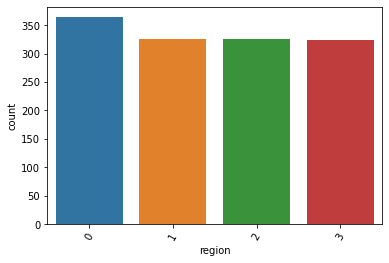

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x="region", data = data)
plt.xticks(rotation = 60)
plt.show()

C:\Users\zahed\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


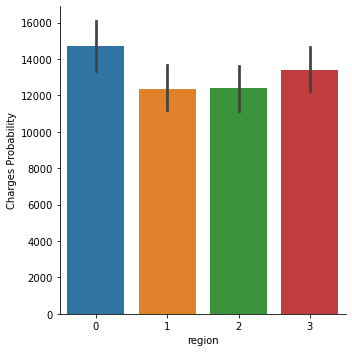

In [14]:
g = sns.factorplot(x = "region", y = "charges", data = data, kind = "bar")
g.set_ylabels("Charges Probability")
plt.show()

In [15]:
data["region"] = data["region"].astype("category")
data = pd.get_dummies(data, columns= ["region"])
data.head()

,age,bmi,charges,sex_0,sex_1,children_0,children_1,children_2,children_3,children_4,children_5,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,19,27.900,16884.92400,1,0,1,0,0,0,0,0,0,1,0,1,0,0
1,18,33.770,1725.55230,0,1,0,1,0,0,0,0,1,0,1,0,0,0
2,28,33.000,4449.46200,0,1,0,0,0,1,0,0,1,0,1,0,0,0
3,33,22.705,21984.47061,0,1,1,0,0,0,0,0,1,0,0,0,1,0
4,32,28.880,3866.85520,0,1,1,0,0,0,0,0,1,0,0,0,1,0


While examining the charges in the charts above, we noticed that there was skewness. We took notes to fix this. We're going to fix this here.

In [16]:
(mu, sigma) = norm.fit(data["charges"])
print("mu {} : {}, sigma {} : {}".format("charges", mu, "charges", sigma))

mu charges : 13270.422265141257, sigma charges : 12105.484975561612


C:\Users\zahed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


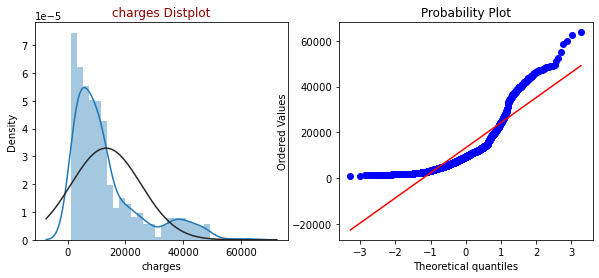

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["charges"], fit=norm)
plt.title("charges Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["charges"], plot = plt)
plt.show()


We have already taken a look at the first graphic above. We can see from the second graph that we have skewness in our data.

The more data is collected above the middle red line, the better.

In [18]:
data["charges"] = np.log1p(data["charges"])
(mu, sigma) = norm.fit(data["charges"])
print("mu {} : {}, sigma {} : {}".format("charges", mu, "charges", sigma))

mu charges : 9.098827980629359, sigma charges : 0.9190355163595243


C:\Users\zahed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


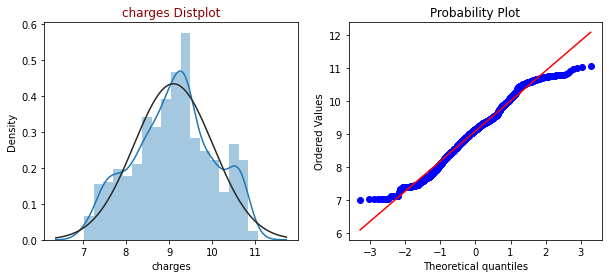

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["charges"], fit=norm)
plt.title("charges Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["charges"], plot = plt)
plt.show()

## Modeling
Import Model Library

Train - Test Split

StandardScaler

Linear Regression

Random Forest Regression

XGB Regression

XGBRF Regression

MLP Regression

Ridge Regression

KNN Regression

Ridge Regression

In [22]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
#from yellowbrick.regressor import PredictionError
#from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
data.head()

,age,bmi,charges,sex_0,sex_1,children_0,children_1,children_2,children_3,children_4,children_5,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,19,27.900,9.734236,1,0,1,0,0,0,0,0,0,1,0,1,0,0
1,18,33.770,7.453882,0,1,0,1,0,0,0,0,1,0,1,0,0,0
2,28,33.000,8.400763,0,1,0,0,0,1,0,0,1,0,1,0,0,0
3,33,22.705,9.998137,0,1,1,0,0,0,0,0,1,0,0,0,1,0
4,32,28.880,8.260455,0,1,1,0,0,0,0,0,1,0,0,0,1,0


In [24]:
y = data.charges
X = data.drop(["charges"], axis = 1)

In [25]:
#Train - Test Split
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = test_size, random_state = 20)
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_test shape {}, len {}.".format(X_test.shape,len(X_test)))
print("Y_train shape {}, len {}.".format(Y_train.shape,len(Y_train)))
print("Y_test shape {}, len {}.".format(Y_test.shape,len(Y_test)))

X_train shape (1070, 16), len 1070.
X_test shape (268, 16), len 268.
Y_train shape (1070,), len 1070.
Y_test shape (268,), len 268.


In [26]:
#StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 
result = []
#We have defined the list in which we will save the model results for later comparison.

In [27]:
#Linear Regression
multiple_linear = LinearRegression()
multiple_linear.fit(X_train, Y_train)
predict = multiple_linear.predict(X_test)
score = r2_score(Y_test,predict)
result.append(score)
print("r_square score --> ",score)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, predict)))


r_square score -->  0.8271895937402768
Mean Absolute Error --> 0.2662878686338911
Mean Squared Error --> 0.1483698925964736
Root Mean Squared Error --> 0.38518812624024845


In [28]:
df_linearRegression = pd.DataFrame({'Actual': Y_test, 'Predicted': predict})
df_linearRegression.head()

,Actual,Predicted
698,9.303580,9.262644
520,10.152594,9.080168
1144,9.172784,9.242869
908,9.627146,9.801463
559,7.406972,8.036082


In [37]:
#Random Forest Regression
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

rf_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#We define the parameters for random forest. We will use these to find the best parameters when building our model.

In [38]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rf_param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)
rf_predict = rf_random.predict(X_test)
score_rf = r2_score(Y_test,rf_predict)
result.append(score_rf)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\zahed\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [39]:
print("r_square score --> ",score_rf)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, rf_predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, rf_predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, rf_predict)))

r_square score -->  0.9099356210073678
Mean Absolute Error --> 0.16259200832909806
Mean Squared Error --> 0.07732660623354723
Root Mean Squared Error --> 0.2780766193579518


In [40]:
df_RandomForestRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': rf_predict})
df_RandomForestRegressor.head()


,Actual,Predicted
698,9.303580,9.368118
520,10.152594,9.191836
1144,9.172784,9.361951
908,9.627146,9.802257
559,7.406972,7.479147


In [ ]:
# Gradient Boosting Regression
gbr = GradientBoostingRegressor(max_depth=3, random_state=42)
gbr.fit(X_train, Y_train)
gbr_predict = gbr.predict(X_test)
score_gbr = r2_score(Y_test,gbr_predict)
result.append(score_gbr)
print("r_square score --> ",score_gbr)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, gbr_predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, gbr_predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, gbr_predict)))


In [ ]:
df_GBRRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': gbr_predict})
df_GBRRegressor.head()

In [41]:
#KNN Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)
knn_predict = knn.predict(X_test)
score_knn = r2_score(Y_test,knn_predict)
result.append(score_knn)
print("r_square score --> ",score_knn)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, knn_predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, knn_predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, knn_predict)))

r_square score -->  0.8371182023334395
Mean Absolute Error --> 0.2618217316599221
Mean Squared Error --> 0.13984548354910417
Root Mean Squared Error --> 0.3739592003803412


In [42]:
df_KNNRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': knn_predict})
df_KNNRegressor.head()

,Actual,Predicted
698,9.303580,9.283840
520,10.152594,9.493649
1144,9.172784,8.943938
908,9.627146,9.407459
559,7.406972,8.093638


In [43]:
df_result = pd.DataFrame({"Score":result, "ML Models":["LinearRegression","RandomForestRegression","KNN Regression","Gradient Boosting Regression"]})
df_result

ValueError: All arrays must be of the same length

In [ ]:
g = sns.barplot("Score", "ML Models", data = df_result)
g.set_xlabel("Score")
g.set_title("Regression Model Results", color = "darkred")
plt.show()

Finally, we examine all results by visualizing.

As it is understood from the graph, we have 4 models above 90 and the best among them is Gradient Boosting Regression.